In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import colorsys
plt.style.use('seaborn-talk')
%matplotlib inline

In [2]:
df = pd.read_excel('airlines.xlsx')

In [3]:
#Lets take a look at our data
df.head(15)

,Airline ID,Name,Alias,IATA,ICAO,Callsign,Country,Active
0,-1,Unknown,\N,-,NaN,\N,\N,Y
1,1,Private flight,\N,-,NaN,NaN,NaN,Y
2,2,135 Airways,\N,NaN,GNL,GENERAL,United States,N
3,3,1Time Airline,\N,1T,RNX,NEXTIME,South Africa,Y
4,4,2 Sqn No 1 Elementary Flying Training School,\N,NaN,WYT,NaN,United Kingdom,N
5,5,213 Flight Unit,\N,NaN,TFU,NaN,Russia,N
6,6,223 Flight Unit State Airline,\N,NaN,CHD,CHKALOVSK-AVIA,Russia,N
7,7,224th Flight Unit,\N,NaN,TTF,CARGO UNIT,Russia,N
8,8,247 Jet Ltd,\N,NaN,TWF,CLOUD RUNNER,United Kingdom,N
9,9,3D Aviation,\N,NaN,SEC,SECUREX,United States,N


In [4]:
#We can delete the Alias column
del df['Alias']

In [5]:
df.head(15)

,Airline ID,Name,IATA,ICAO,Callsign,Country,Active
0,-1,Unknown,-,NaN,\N,\N,Y
1,1,Private flight,-,NaN,NaN,NaN,Y
2,2,135 Airways,NaN,GNL,GENERAL,United States,N
3,3,1Time Airline,1T,RNX,NEXTIME,South Africa,Y
4,4,2 Sqn No 1 Elementary Flying Training School,NaN,WYT,NaN,United Kingdom,N
5,5,213 Flight Unit,NaN,TFU,NaN,Russia,N
6,6,223 Flight Unit State Airline,NaN,CHD,CHKALOVSK-AVIA,Russia,N
7,7,224th Flight Unit,NaN,TTF,CARGO UNIT,Russia,N
8,8,247 Jet Ltd,NaN,TWF,CLOUD RUNNER,United Kingdom,N
9,9,3D Aviation,NaN,SEC,SECUREX,United States,N


In [6]:
#with this dataset i will do a simple exercice, basically we are going
#to show how many airlines each country has, divided by active and inactive
#and we also want to show the relation between active and inactive

df1 = df[['Country', 'Active']]

In [7]:
df1.head(20)

,Country,Active
0,\N,Y
1,NaN,Y
2,United States,N
3,South Africa,Y
4,United Kingdom,N
5,Russia,N
6,Russia,N
7,Russia,N
8,United Kingdom,N
9,United States,N


In [8]:
df1 = df1.drop(labels = [0, 1], axis=0)

In [9]:
df1.head(5)

,Country,Active
2,United States,N
3,South Africa,Y
4,United Kingdom,N
5,Russia,N
6,Russia,N


In [10]:
#Now we are going to split the columns to create another dataframe with the following format
#country, total, active, non_active

total = df1.groupby('Country').size()
active = df1[df1.Active == 'Y'].groupby('Country').size()
non_active = df1[df1.Active == 'N'].groupby('Country').size()
df2 = pd.concat([total, active, non_active], axis=1).rename(columns={0: 'total', 1: 'active', 2: 'non_active'})

In [11]:
#we have some dirty information in our data that does not correspond to any country, lets clear it
df2.dropna()

,total,active,non_active
Country,,,
Afghanistan,8,4.0,4.0
Albania,4,2.0,2.0
Algeria,6,2.0,4.0
Angola,37,2.0,35.0
Antigua and Barbuda,4,1.0,3.0
...,...,...,...
Vietnam,8,7.0,1.0
Yemen,3,2.0,1.0
Zambia,23,3.0,20.0


In [12]:
#Lets look at the first 10 countries based on total airlines
df3 = df2.nlargest(10, 'total')


In [13]:
df3

,total,active,non_active
Country,,,
United States,1099,156.0,943.0
Mexico,440,13.0,427.0
United Kingdom,414,45.0,369.0
Canada,323,37.0,286.0
Russia,238,80.0,158.0
Spain,168,26.0,142.0
Germany,135,38.0,97.0
France,123,25.0,98.0
Australia,93,26.0,67.0


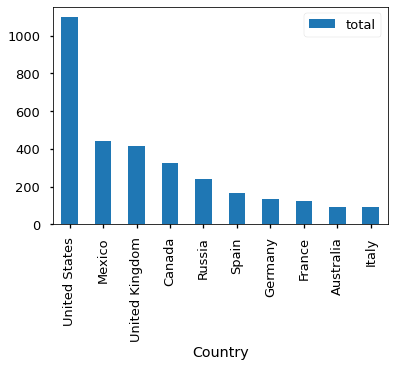

In [14]:
#To have a better visualization lets plot a bar graph for the first 10 countries in total airlines

df3.plot.bar(y='total')
plt.show()

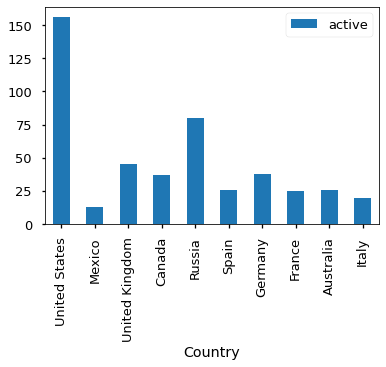

In [19]:
#Bar graph for the first 10 countries in active airlines (based on the our list from top 10 total)
df3.plot.bar(y='active')
plt.show()


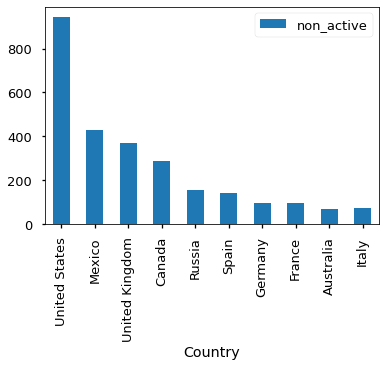

In [20]:
#Bar graph for the first 10 countries in non active airlines (based on the our list from top 10 total)
df3.plot.bar(y='non_active')
plt.show()

In [21]:
#Lets find out how much the non active airlines represents from the total airlines
df3['Percentage of non active'] = df3['non_active'] / df3['total']
df3['Percentage of non active'] = df3['Percentage of non active'].round(decimals = 2) * 100
df3

,total,active,non_active,Percentage of non active
Country,,,,
United States,1099,156.0,943.0,86.0
Mexico,440,13.0,427.0,97.0
United Kingdom,414,45.0,369.0,89.0
Canada,323,37.0,286.0,89.0
Russia,238,80.0,158.0,66.0
Spain,168,26.0,142.0,85.0
Germany,135,38.0,97.0,72.0
France,123,25.0,98.0,80.0
Australia,93,26.0,67.0,72.0


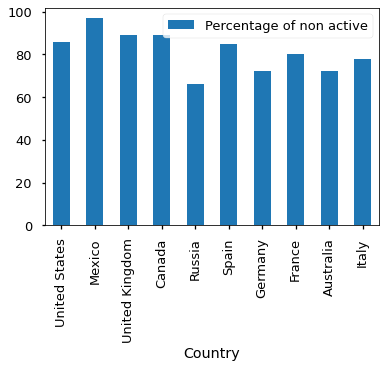

In [22]:
#As we can see from the dataframe above, most mexican airlines are not active anymore, Russia has the
#best ratio of non_active/total. Lets plot a graph

df3.plot.bar(y='Percentage of non active')
plt.show()

In [ ]:
#We can see that the airline business is a difficult enviroment.